In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [31]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [32]:
# import data set
df= pd.read_csv(r'C:\Users\mateu\Desktop\CF\6.0\covid_19.csv')

In [33]:
# check
df.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,new_tests_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,11565.595138,57664.07353,171.137304,172.673031,0.126,0.126,509.384956,1.68681,1.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
1,1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,0.126,0.000,509.384956,1.68681,1.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
2,2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,0.126,0.000,509.384956,1.68681,1.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
3,3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,0.126,0.000,509.384956,1.68681,1.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
4,4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,0.126,0.000,509.384956,1.68681,1.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511


In [34]:
# renaming column
df.rename(columns= {'iso_code':'Country_Code'},inplace=True)
# droping column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
pd.options.display.max_columns = None
# check
df.head()

,Country_Code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,new_tests_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,11565.595138,57664.07353,171.137304,172.673031,0.126,0.126,509.384956,1.68681,1.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,0.126,0.000,509.384956,1.68681,1.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,0.126,0.000,509.384956,1.68681,1.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,0.126,0.000,509.384956,1.68681,1.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,11565.595138,57664.07353,171.137304,172.673031,0.126,0.000,509.384956,1.68681,1.001026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,10.627229,32.778221,37.746,0.5,64.83,0.511


In [35]:
df.columns

Index(['Country_Code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'reproduction_rate', 'new_tests_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
       'female_smokers', 'male_smokers', 'handwashing_facilities',
       'hospital_beds_per_thousand', 'life_

In [46]:
# creating subset to save memory and time
df1 = df[['total_cases','new_cases','total_deaths','population','population_density','median_age', 'aged_65_older', 'aged_70_older','people_vaccinated', 'people_fully_vaccinated']]

In [50]:
# changing data type
df1[['total_cases','new_cases','total_deaths','population','population_density','median_age','aged_65_older','aged_70_older']] = df1[['total_cases','new_cases','total_deaths','population','population_density','median_age','aged_65_older','aged_70_older']].astype('int64')
# check
df1.head()


C:\Users\mateu\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,total_cases,new_cases,total_deaths,population,population_density,median_age,aged_65_older,aged_70_older,people_vaccinated,people_fully_vaccinated
0,5,5,57664,39835428,54,18,2,1,0.0,0.0
1,5,0,57664,39835428,54,18,2,1,0.0,0.0
2,5,0,57664,39835428,54,18,2,1,0.0,0.0
3,5,0,57664,39835428,54,18,2,1,0.0,0.0
4,5,0,57664,39835428,54,18,2,1,0.0,0.0


### The elbow technique

In [32]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [33]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3.30526286905628e+21,
 -3.387185037793679e+20,
 -1.0510918221686763e+20,
 -4.689142999821854e+19,
 -2.485569035817913e+19,
 -1.682868670209255e+19,
 -1.2329899368568908e+19,
 -9.224069485103438e+18,
 -7.33623044731114e+18]

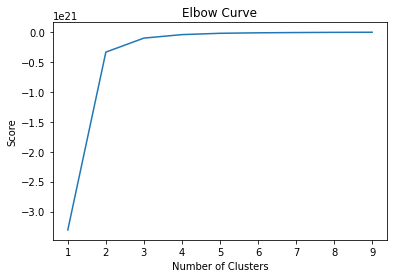

In [22]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In my example, the elbow, or the breaking point of the curve starts to turn out at 2 and ends at 3, so I can use2 and  3  as the number of clusters

### k-means clustering

In [53]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 


In [54]:
# Fit the k-means object to the data.

kmeans.fit(df1)

C:\Users\mateu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [55]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\mateu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\mateu\AppData\Local\Temp/ipykernel_16476/865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [27]:
df1.head()

,total_cases,new_cases,total_deaths,population,population_density,median_age,aged_65_older,aged_70_older,clusters
0,5,5,57664,39835428,54,18,2,1,0
1,5,0,57664,39835428,54,18,2,1,0
2,5,0,57664,39835428,54,18,2,1,0
3,5,0,57664,39835428,54,18,2,1,0
4,5,0,57664,39835428,54,18,2,1,0


In [56]:
df1['clusters'].value_counts()

1    142614
2     11124
0      1540
Name: clusters, dtype: int64

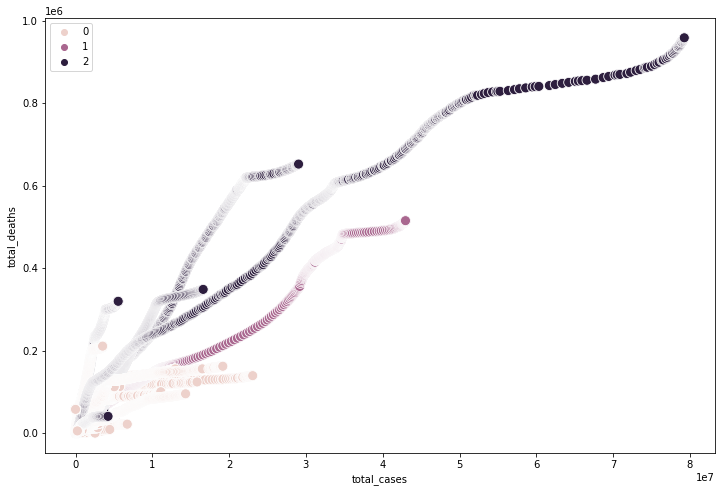

In [30]:
# Plot the clusters for the "total_cases" and "total_deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_cases'], y=df1['total_deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_cases') # Label x-axis.
plt.ylabel('total_deaths') # Label y-axis.
plt.show()

#### In this case, the greater the number of cases, the greater the number of deaths. The increase in the number of cases is not commensurate with the number of deaths, and not all cases have resulted in death.

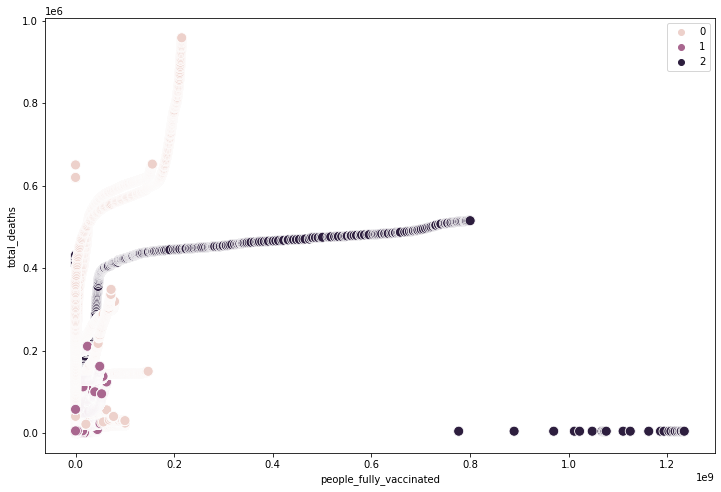

In [51]:
# Plot the clusters for the "people_fully_vaccinated" and "total_deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['people_fully_vaccinated'], y=df1['total_deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('people_fully_vaccinated') # Label x-axis.
plt.ylabel('total_deaths') # Label y-axis.
plt.show()

#### The effect of vaccines on mortality is noticeable. 

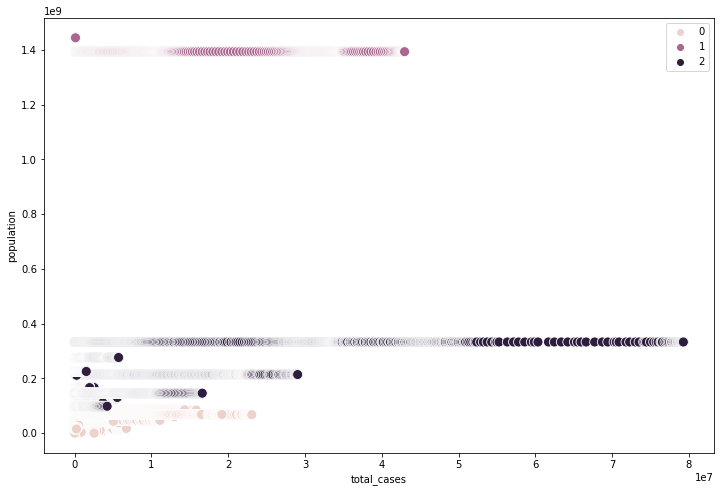

In [31]:
# Plot the clusters for the "total_cases" and "population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_cases'], y=df1['population'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_cases') # Label x-axis.
plt.ylabel('population') # Label y-axis.
plt.show()

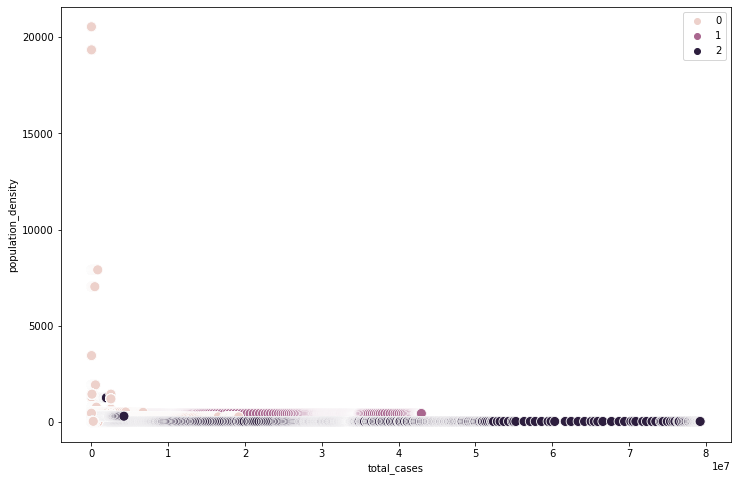

In [32]:
# Plot the clusters for the "total_cases" and "population_density" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_cases'], y=df1['population_density'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_cases') # Label x-axis.
plt.ylabel('population_density') # Label y-axis.
plt.show()

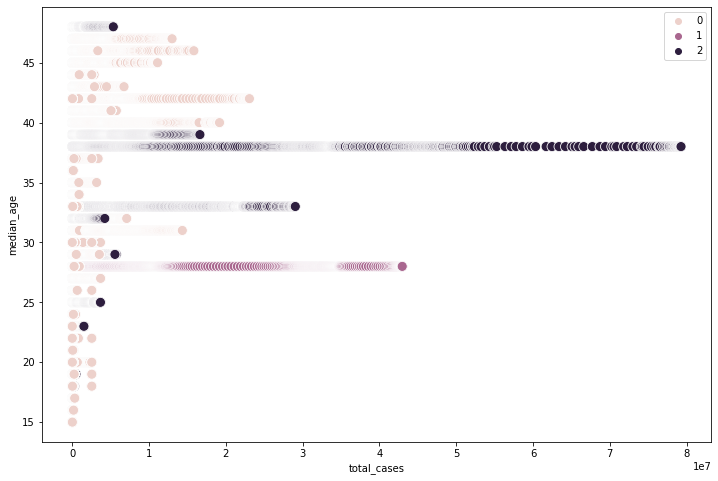

In [33]:
# Plot the clusters for the "total_cases" and "median_age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_cases'], y=df1['median_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_cases') # Label x-axis.
plt.ylabel('median_age') # Label y-axis.
plt.show()

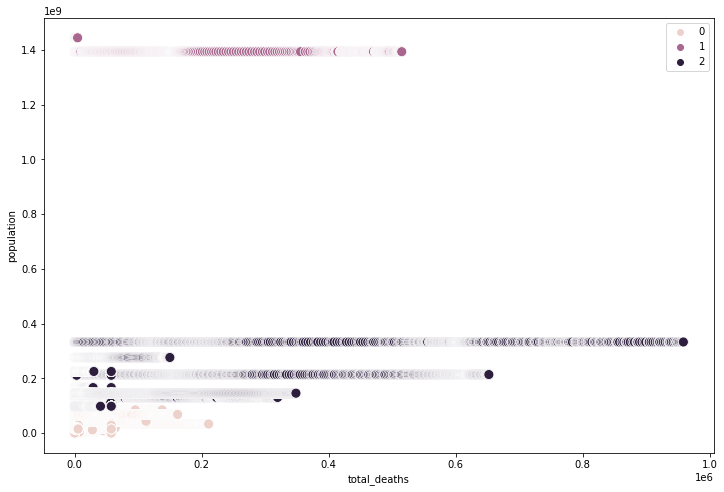

In [34]:
# Plot the clusters for the "total_deaths" and "population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_deaths'], y=df1['population'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_deaths') # Label x-axis.
plt.ylabel('population') # Label y-axis.
plt.show()

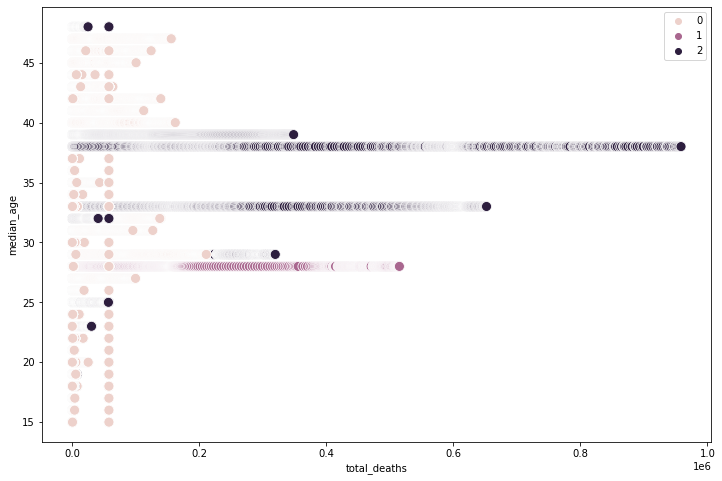

In [35]:
# Plot the clusters for the "total_deaths" and "median_age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_deaths'], y=df1['median_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_deaths') # Label x-axis.
plt.ylabel('median_age') # Label y-axis.
plt.show()

##### A large number of deaths occur at the median age of 35-40 years.It would be worth looking at why in some age groups (not the oldest ones) the death rate is higher than in others.

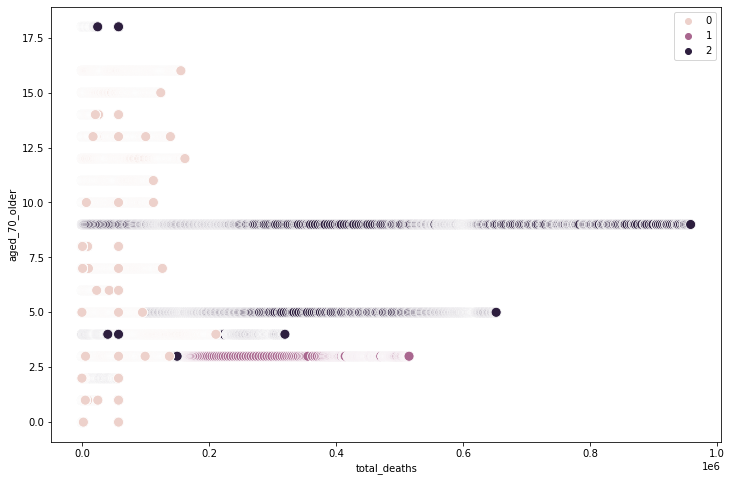

In [36]:
# Plot the clusters for the "total_deaths" and "aged_70_older" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_deaths'], y=df1['aged_70_older'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_deaths') # Label x-axis.
plt.ylabel('aged_70_older') # Label y-axis.
plt.show()

#### The mortality rate is higher in a certain range of the population of people aged 75 and over

In [57]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\mateu\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\mateu\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [58]:
df1.columns

Index(['total_cases', 'new_cases', 'total_deaths', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'people_vaccinated', 'people_fully_vaccinated', 'clusters', 'cluster'],
      dtype='object')

In [60]:
df1.groupby('cluster').agg({'total_cases':['mean', 'median'], 
                          'new_cases':['mean', 'median'], 
                          'total_deaths':['mean', 'median'],  
                         'population':['mean', 'median'], 
                         'population_density':['mean', 'median'],
                           'median_age':['mean', 'median'], 
                            'aged_65_older':['mean', 'median'],
                             'people_fully_vaccinated':['mean', 'median'],
                            'aged_70_older':['mean', 'median']})

total_cases               new_cases           total_deaths  \
                     mean    median          mean  median           mean   
cluster                                                                    
dark purple  3.780442e+06  468830.5  15887.174488  1739.0   85643.332974   
pink         8.404575e+06   98218.5  27992.201299   174.5  114427.729221   
purple       3.554673e+05   17484.0   1804.708780    51.0   14362.490562   

                        population               population_density         \
              median          mean        median               mean median   
cluster                                                                      
dark purple  16543.5  1.633846e+08  1.302622e+08         226.921521  104.0   
pink          4636.0  1.418945e+09  1.444216e+09         297.712987  147.0   
purple         866.0  1.324672e+07  5.465629e+06         488.574439   90.0   

            median_age        aged_65_older        people_fully_vaccinated  \
                  mean median          mean median                    mean   
cluster                                                                      
dark purple  29.356706   29.0      8.124506    5.0            1.654079e+07   
pink         33.025974   38.0      7.512987   10.0            8.175610e+07   
purple       30.205520   30.0      8.275303    8.0            1.095803e+06   

                   aged_70_older         
            median          mean median  
cluster                                  
dark purple    0.0      4.959008    3.0  
pink           0.0      4.005195    5.0  
purple         0.0      5.056530    5.0

#### Most are dark purple and purple have higher stats than pink
#### In dark purple, the population median is much higher than the rest
#### In purple, the median of total cases is more than twice as high as the other clusters


### K-means with 2 clusters

In [39]:
# Create the k-means object.

kmeans2 = KMeans(n_clusters = 2, n_jobs = -1) 


In [40]:
# Fit the k-means2 object to the data.

kmeans2.fit(df1)

C:\Users\mateu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1)

In [41]:
df1['clusters2'] = kmeans2.fit_predict(df1)
# check
df1.head()

C:\Users\mateu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\mateu\AppData\Local\Temp/ipykernel_16476/2522806720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters2'] = kmeans2.fit_predict(df1)


,total_cases,new_cases,total_deaths,population,population_density,median_age,aged_65_older,aged_70_older,clusters2
0,5,5,57664,39835428,54,18,2,1,0
1,5,0,57664,39835428,54,18,2,1,0
2,5,0,57664,39835428,54,18,2,1,0
3,5,0,57664,39835428,54,18,2,1,0
4,5,0,57664,39835428,54,18,2,1,0


In [42]:
df1['clusters2'].value_counts()

0    153738
1      1540
Name: clusters2, dtype: int64

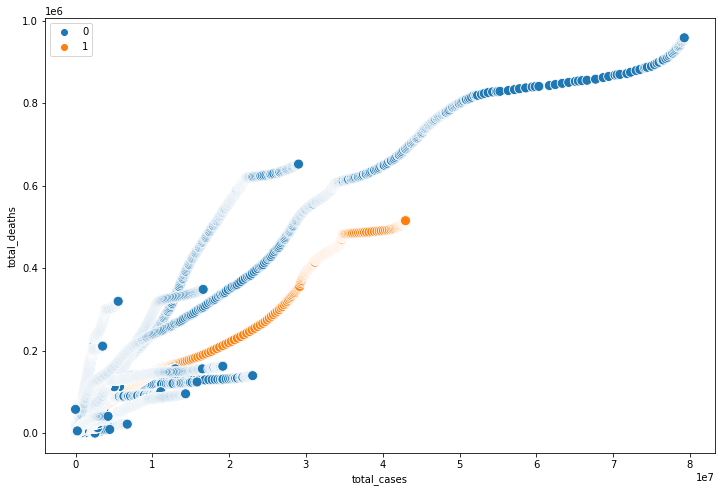

In [39]:
# Plot the clusters for the "total_cases" and "total_deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_cases'], y=df1['total_deaths'], hue=kmeans2.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_cases') # Label x-axis.
plt.ylabel('total_deaths') # Label y-axis.
plt.show()

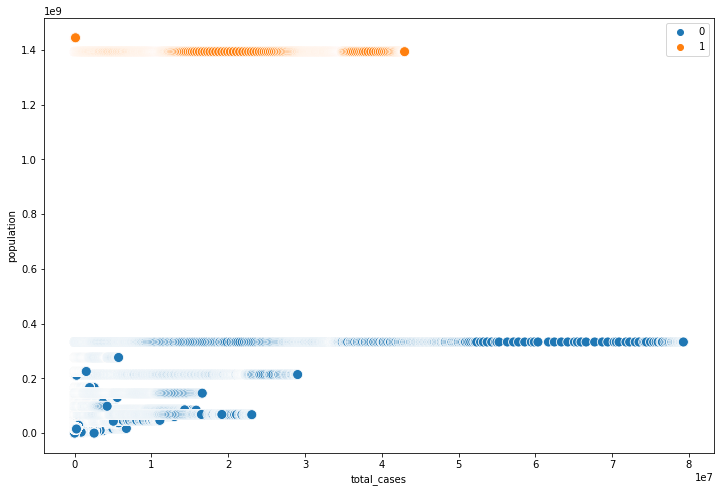

In [41]:
# Plot the clusters for the "total_cases" and "population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_cases'], y=df1['population'], hue=kmeans2.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_cases') # Label x-axis.
plt.ylabel('population') # Label y-axis.
plt.show()

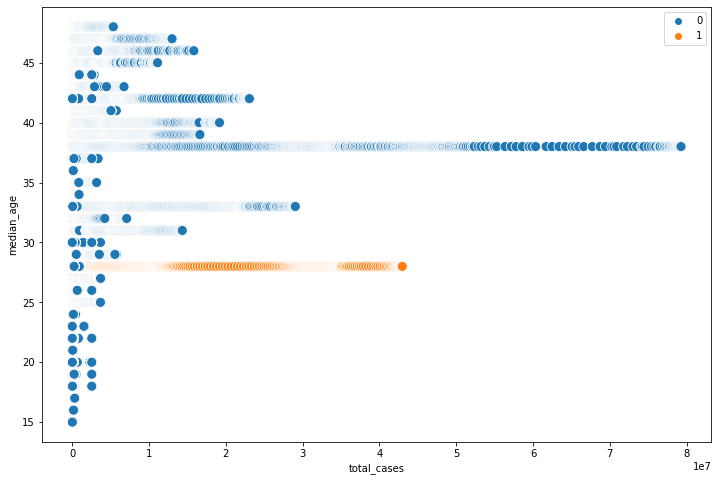

In [42]:
# Plot the clusters for the "total_cases" and "median_age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_cases'], y=df1['median_age'], hue=kmeans2.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_cases') # Label x-axis.
plt.ylabel('median_age') # Label y-axis.
plt.show()

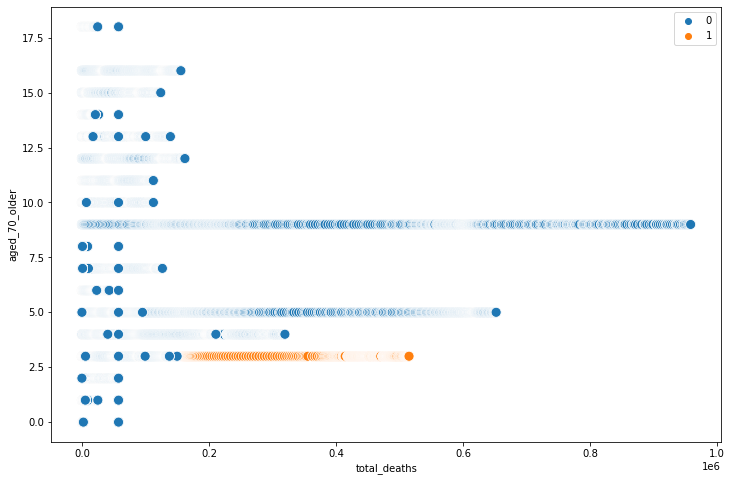

In [43]:
# Plot the clusters for the "total_deaths" and "aged_70_older" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['total_deaths'], y=df1['aged_70_older'], hue=kmeans2.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('total_deaths') # Label x-axis.
plt.ylabel('aged_70_older') # Label y-axis.
plt.show()

In [43]:
df1.loc[df1['clusters2'] == 1, 'clusters2'] = 'orange'
df1.loc[df1['clusters2'] == 0, 'clusters2'] = 'blue'

C:\Users\mateu\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [44]:
df1.groupby('clusters2').agg({'total_cases':['mean', 'median'], 
                          'new_cases':['mean', 'median'], 
                          'total_deaths':['mean', 'median'],  
                         'population':['mean', 'median'], 
                         'population_density':['mean', 'median'],
                           'median_age':['mean', 'median'], 
                            'aged_65_older':['mean', 'median'],                         
                            'aged_70_older':['mean', 'median']})

total_cases              new_cases          total_deaths          \
                   mean   median          mean median           mean  median   
clusters2                                                                      
blue       6.032877e+05  22042.5   2823.671877   69.0   19520.148987  1150.0   
orange     8.404575e+06  98218.5  27992.201299  174.5  114427.729221  4636.0   

             population               population_density        median_age  \
                   mean        median               mean median       mean   
clusters2                                                                    
blue       2.411023e+07  6.769151e+06         469.642053   96.0  30.144102   
orange     1.418945e+09  1.444216e+09         297.712987  147.0  33.025974   

                 aged_65_older        aged_70_older         
          median          mean median          mean median  
clusters2                                                   
blue        30.0      8.264391    7.0      5.049474    4.0  
orange      38.0      7.512987   10.0      4.005195    5.0